In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("customer_behavior_dataset.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,MembershipStatus,ProductCategory,PurchaseFrequency,AvgTransactionValue,ChurnRisk,PurchaseNextMonth,ExpectedSpend
0,1,56,Female,43615,1.001152,Gold,Health & Beauty,1,28.254951,1.000000,0,0.0000
1,2,69,Male,55253,42.240017,Bronze,Electronics,4,1000.000000,0.574014,0,0.0000
2,3,46,Male,78196,52.728508,Gold,Home & Living,6,1000.000000,0.760902,0,0.0000
3,4,32,Male,62125,6.408808,Bronze,Electronics,1,257.634820,0.918445,0,0.0000
4,5,60,Male,94789,97.334738,Silver,Electronics,13,1000.000000,0.335050,1,885.4211


In [4]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
AnnualIncome           0
SpendingScore          0
MembershipStatus       0
ProductCategory        0
PurchaseFrequency      0
AvgTransactionValue    0
ChurnRisk              0
PurchaseNextMonth      0
ExpectedSpend          0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AvgTransactionValue,ChurnRisk,PurchaseNextMonth,ExpectedSpend
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,60450.994000,50.313998,3.550000,873.068489,0.618159,0.238000,240.802732
std,288.819436,14.99103,14773.387107,28.254504,3.126223,254.445485,0.243070,0.426072,453.319985
min,1.000000,18.00000,20000.000000,1.001152,1.000000,28.254951,0.008357,0.000000,0.000000
25%,250.750000,31.00000,50820.500000,25.738610,1.000000,920.838871,0.430594,0.000000,0.000000
50%,500.500000,44.00000,60128.000000,50.580937,2.000000,1000.000000,0.651126,0.000000,0.000000
75%,750.250000,56.00000,70176.750000,74.231349,5.000000,1000.000000,0.823350,0.000000,0.000000
max,1000.000000,69.00000,107896.000000,99.956213,19.000000,1000.000000,1.000000,1.000000,1496.672609


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1000 non-null   int64  
 1   Age                  1000 non-null   int64  
 2   Gender               1000 non-null   object 
 3   AnnualIncome         1000 non-null   int64  
 4   SpendingScore        1000 non-null   float64
 5   MembershipStatus     1000 non-null   object 
 6   ProductCategory      1000 non-null   object 
 7   PurchaseFrequency    1000 non-null   int64  
 8   AvgTransactionValue  1000 non-null   float64
 9   ChurnRisk            1000 non-null   float64
 10  PurchaseNextMonth    1000 non-null   int64  
 11  ExpectedSpend        1000 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 93.9+ KB


In [7]:
df.drop('CustomerID', axis=1, inplace=True)

In [8]:
df

,Age,Gender,AnnualIncome,SpendingScore,MembershipStatus,ProductCategory,PurchaseFrequency,AvgTransactionValue,ChurnRisk,PurchaseNextMonth,ExpectedSpend
0,56,Female,43615,1.001152,Gold,Health & Beauty,1,28.254951,1.000000,0,0.000000
1,69,Male,55253,42.240017,Bronze,Electronics,4,1000.000000,0.574014,0,0.000000
2,46,Male,78196,52.728508,Gold,Home & Living,6,1000.000000,0.760902,0,0.000000
3,32,Male,62125,6.408808,Bronze,Electronics,1,257.634820,0.918445,0,0.000000
4,60,Male,94789,97.334738,Silver,Electronics,13,1000.000000,0.335050,1,885.421100
...,...,...,...,...,...,...,...,...,...,...,...
995,60,Male,64794,83.460042,Bronze,Health & Beauty,5,1000.000000,0.309600,1,1001.712817
996,64,Female,52437,54.489357,Bronze,Sports,1,1000.000000,0.519148,0,0.000000
997,62,Female,58777,84.621925,Gold,Fashion,5,1000.000000,0.545572,0,0.000000
998,35,Female,65215,43.698869,Bronze,Grocery,4,1000.000000,0.609473,0,0.000000


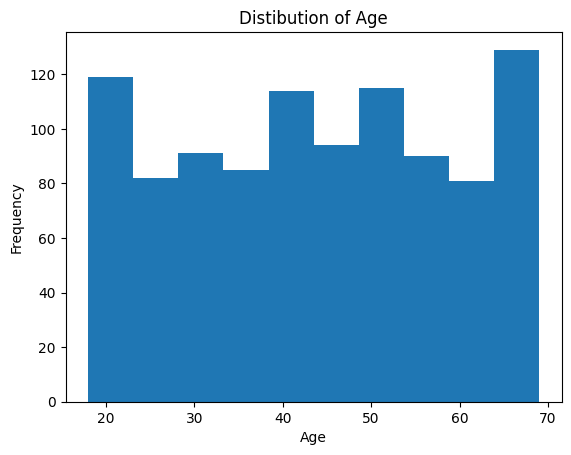

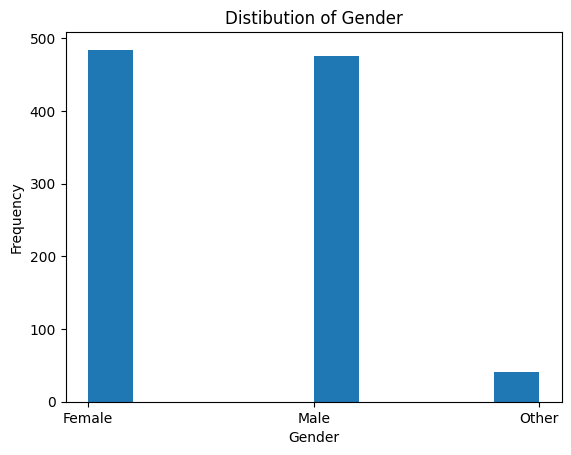

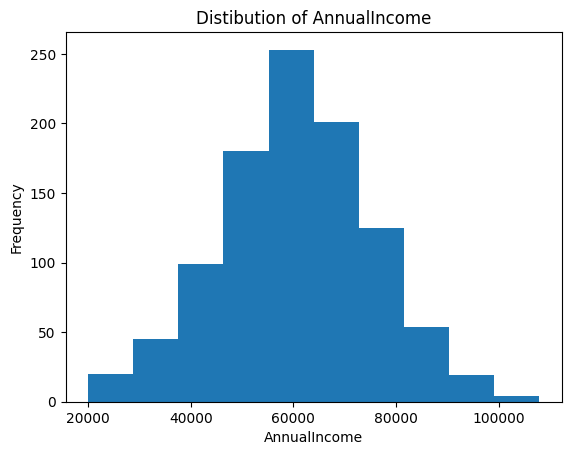

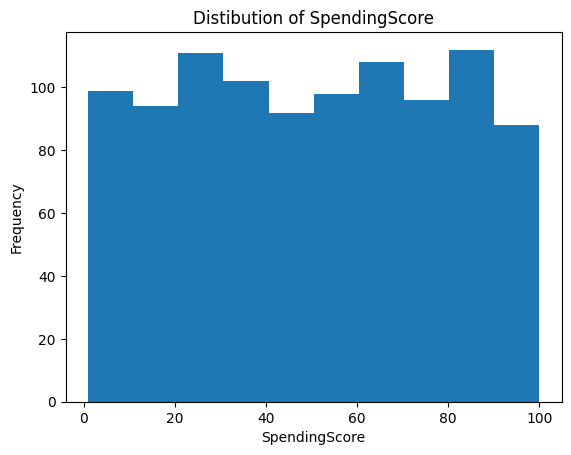

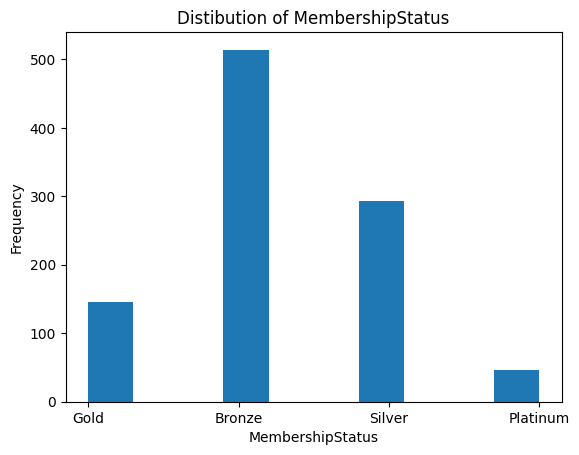

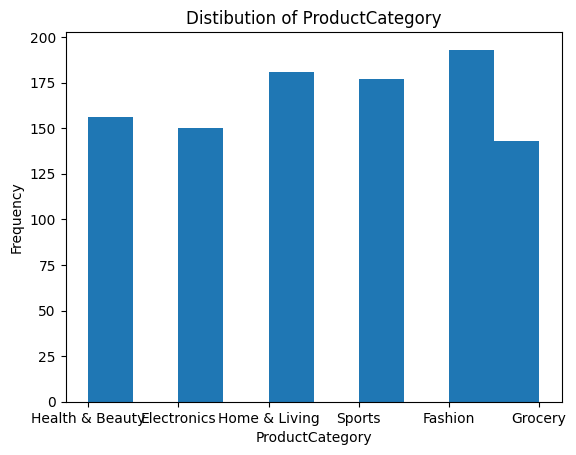

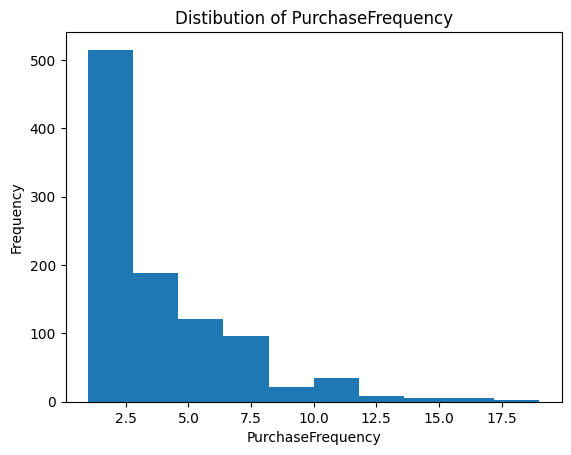

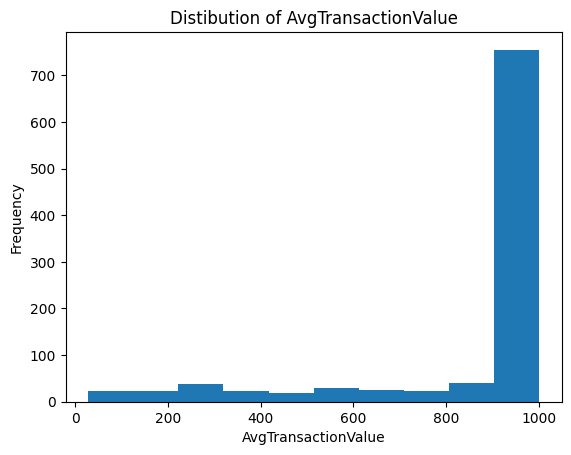

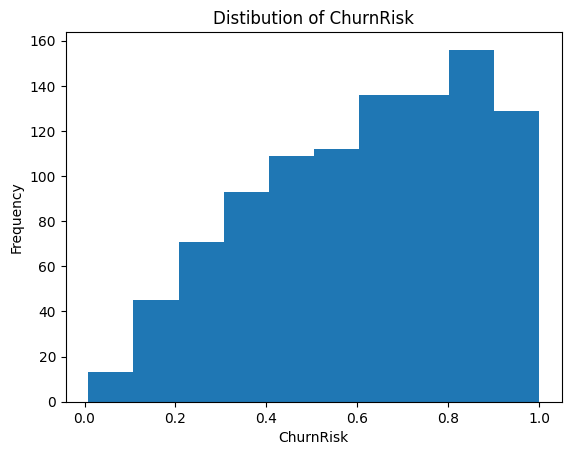

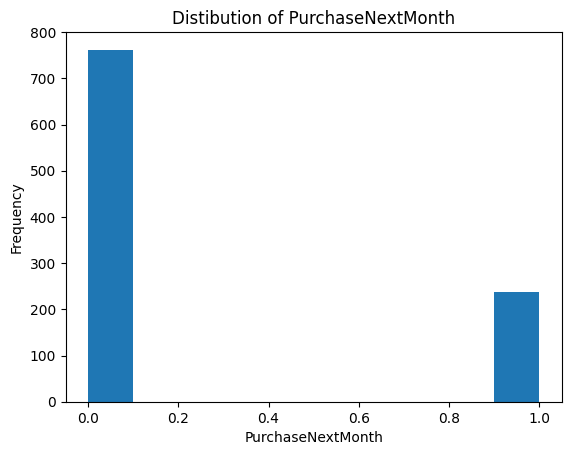

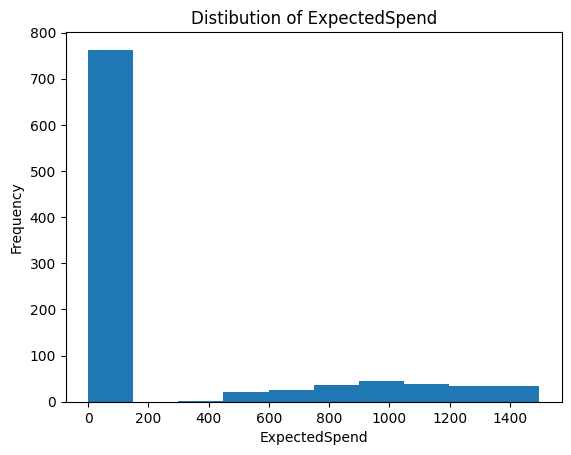

In [9]:

for column in df.columns:
    plt.hist(df[column])
    plt.title(f"Distibution of {column}")
    plt.ylabel("Frequency")
    plt.xlabel(f"{column}")
    plt.show() 

Regression Problem

In [10]:
df_reg = df.drop('PurchaseNextMonth', axis=1)


In [11]:
df_reg

,Age,Gender,AnnualIncome,SpendingScore,MembershipStatus,ProductCategory,PurchaseFrequency,AvgTransactionValue,ChurnRisk,ExpectedSpend
0,56,Female,43615,1.001152,Gold,Health & Beauty,1,28.254951,1.000000,0.000000
1,69,Male,55253,42.240017,Bronze,Electronics,4,1000.000000,0.574014,0.000000
2,46,Male,78196,52.728508,Gold,Home & Living,6,1000.000000,0.760902,0.000000
3,32,Male,62125,6.408808,Bronze,Electronics,1,257.634820,0.918445,0.000000
4,60,Male,94789,97.334738,Silver,Electronics,13,1000.000000,0.335050,885.421100
...,...,...,...,...,...,...,...,...,...,...
995,60,Male,64794,83.460042,Bronze,Health & Beauty,5,1000.000000,0.309600,1001.712817
996,64,Female,52437,54.489357,Bronze,Sports,1,1000.000000,0.519148,0.000000
997,62,Female,58777,84.621925,Gold,Fashion,5,1000.000000,0.545572,0.000000
998,35,Female,65215,43.698869,Bronze,Grocery,4,1000.000000,0.609473,0.000000


In [12]:
num_columns = ['Age', 'AnnualIncome', 'SpendingScore', 
               'PurchaseFrequency', 'AvgTransactionValue', 'ChurnRisk']
ord_columns = ['MembershipStatus']
cat_columns = ['Gender', 'ProductCategory']

In [13]:
X = df_reg.drop('ExpectedSpend', axis=1)
y= df_reg['ExpectedSpend']

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(), cat_columns),
        ('ord', OrdinalEncoder(), ord_columns)
    ]
)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


models= {
    'lin_reg': LinearRegression(),
    'ridge' : Ridge(),
    'lasso' : Lasso(),
    'decision_tree' : DecisionTreeRegressor(),
    'random_forest' : RandomForestRegressor()
}


In [19]:
for name, model in models.items():
    pipe = Pipeline(steps=[('model',model)])
    pipe.fit(X_train, y_train)
    y_pred= pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(model)
    print("MAE: ",  mae)
    print("R2 Score: ",r2)
    print('=='* 20)


LinearRegression()
MAE:  287.7272902952021
R2 Score:  0.23141883346313818
Ridge()
MAE:  287.6244514035996
R2 Score:  0.23182389960284877
Lasso()
MAE:  286.5485712796498
R2 Score:  0.236158121644779
DecisionTreeRegressor()
MAE:  347.3909465273721
R2 Score:  -0.733763332035164
RandomForestRegressor()
MAE:  287.36774827968515
R2 Score:  0.18204340503946315


In [20]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators' : [10,50, 100, 150],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth' : [1, 2, 3, 4, 5, 10],
    'max_features' : ['sqrt', 'log2', None]
}

In [21]:
rf = RandomForestRegressor()
grid_search= GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='r2', n_jobs=-1)


In [22]:
grid_search.fit(X_train,y_train)



/Users/emamidi/Desktop/side_quests/.venv/lib/python3.9/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='r2')

In [23]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 10}

In [24]:
best_rf = RandomForestRegressor(criterion = 'poisson', max_depth =  5, max_features = 'log2', n_estimators = 50)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ",  mae)
print("R2 Score: ",r2)



MAE:  277.37832046371074
R2 Score:  0.2530072801582841


In [25]:
import pickle

pickle.dump(best_rf, open('best_rf.pkl', 'wb'))